In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.3.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('dataset/credit-a.csv', header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [6]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [7]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [12]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 4ms/step - loss: 16.5928 - acc: 0.4533
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 13.4588 - acc: 0.4487
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 11.0898 - acc: 0.4548
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 9.1753 - acc: 0.4640
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 7.7183 - acc: 0.4655
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 6.6160 - acc: 0.4594
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 5.6894 - acc: 0.4518
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 4.9272 - acc: 0.4518
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 4.2796 - acc: 0.4548
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 3.7588 - acc: 0.4594
Epoch 11/100
21/21 [==============================] - 0s

In [13]:
history.history.keys()

dict_keys(['loss', 'acc'])

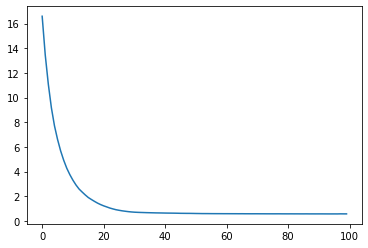

In [14]:
plt.plot(history.epoch, history.history.get('loss'))

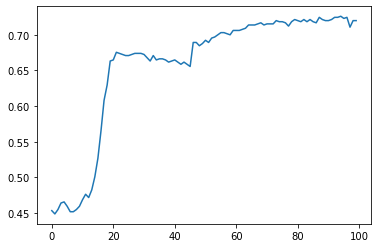

In [15]:
plt.plot(history.epoch, history.history.get('acc'))